In [1]:
df2 = pd.read_excel('F1B_AfterEDA.xlsx')

In [2]:
df2.dtypes

CASE_STATUS               int64
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR            int64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration            int64
Emp_Stay_Duration_Yr    float64
EMPLOYER_FREQUENCY        int64
AGENT_ATTORNEY            int64
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [3]:
df2['CASE_STATUS'] = df2['CASE_STATUS'].astype('object')
df2['PW_SOURCE_YEAR'] = df2['PW_SOURCE_YEAR'].astype('object')
df2['CS_DD_Duration'] = df2['CS_DD_Duration'].astype('object')
df2['Emp_Stay_Duration_Yr'] = df2['Emp_Stay_Duration_Yr'].astype('object')
df2['AGENT_ATTORNEY'] = df2['AGENT_ATTORNEY'].astype('object')


In [4]:
df2.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR           object
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY        int64
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

# CREATING MODEL

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef,cohen_kappa_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve,accuracy_score
from sklearn import metrics

In [6]:
df2['CASE_STATUS'] = df2.CASE_STATUS.astype('int')

### Transformed with Standard Scalar and Model

In [7]:
X = df2.drop(['CASE_STATUS','TOTAL_WORKERS'],axis=1)
y = df2.CASE_STATUS

In [8]:
X.isnull().sum()

FULL_TIME_POSITION       0
PREVAILING_WAGE          0
PW_UNIT_OF_PAY           0
PW_SOURCE_YEAR           0
H-1B_DEPENDENT           0
WILLFUL_VIOLATOR         0
CS_DD_Duration           0
Emp_Stay_Duration_Yr    13
EMPLOYER_FREQUENCY       0
AGENT_ATTORNEY           0
OCCUPATION               0
PWGrWGFm                 0
dtype: int64

In [9]:
X_dummy = pd.get_dummies(X)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X_dummy.values, j) for j in range(1, X_dummy.shape[1])]

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.2455638274348226,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 91.53670062271479,
 711.0350261030934,
 724.9242302049067,
 1480.0671824172273,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

##### No multi colinearity

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_dummy,y,test_size=0.3,random_state=3)

In [12]:
#Scaling the dataset
sc = StandardScaler()

In [13]:
scaled_train = pd.DataFrame(sc.fit_transform(xtrain), 
                            columns = xtrain.columns)

In [14]:
scaled_test = pd.DataFrame(sc.transform(xtest), 
                           columns = xtest.columns)

In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

##### Logistic Regression

##### Decision Tree

In [17]:
predtree = dtree.fit(xtrain,ytrain).predict(xtest)
print(dtree.score(xtrain,ytrain))
print(accuracy_score(ytest,predtree))
print(cohen_kappa_score(ytest,predtree))
print(classification_report(ytest,predtree))
print(confusion_matrix(ytest,predtree))
probs = dtree.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9985580815830046
0.9886730274849462
0.5636303708260397
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1494
           1       0.99      0.99      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.78      0.79      0.78    115918
weighted avg       0.99      0.99      0.99    115918

[[   868    626]
 [   687 113737]]
auc score is 0.7891652518625154


In [51]:
pred_lr = lg.fit(xtrain,ytrain).predict(xtest)
coh_lr = round(cohen_kappa_score(ytest,predlg), 4)
print ('Cohen_kappa_score:',coh_lr)
test_lr = round(accuracy_score(ytest,predlg), 4)
print ('Test Accuracy:',test_lr )
train_lr = round(lg.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_lr )
pre_lr = round(precision_score(ytest,predlg), 4)
print ('Precision Score:', pre_lr)
re_lr = round(recall_score(ytest,predlg, average='macro'), 4)
print ('Recall Score:', re_lr)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_lr = round(f1_score(ytest,predlg, average='macro'), 4)
print ('F1 Score:', f1_lr )              

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cohen_kappa_score: 0.004
Test Accuracy: 0.9871
Train Accuracy: 0.9868
Precision Score: 0.9871
Recall Score: 0.501
F1 Score: 0.4988


In [59]:
predtree = dtree.fit(xtrain,ytrain).predict(xtest)
coh_dtree = round(cohen_kappa_score(ytest,predtree), 4)
print ('Cohen_kappa_score:',coh_dtree)
test_dtree = round(accuracy_score(ytest,predtree), 4)
print ('Test Accuracy:',test_dtree )
train_dtree = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_dtree )
pre_dtree = round(precision_score(ytest,predtree), 4)
print ('Precision Score:', pre_dtree)
re_dtree = round(recall_score(ytest,predtree, average='macro'), 4)
print ('Recall Score:', re_dtree)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_dtree = round(f1_score(ytest,predtree, average='macro'), 4)
print ('F1 Score:', f1_dtree )              

Cohen_kappa_score: 0.5606
Test Accuracy: 0.9885
Train Accuracy: 0.9986
Precision Score: 0.9945
Recall Score: 0.7874
F1 Score: 0.7803


##### Random Forest

In [18]:
predrf = rf.fit(xtrain,ytrain).predict(xtest)
print(rf.score(xtrain,ytrain))
print(accuracy_score(ytest,predrf))
print(cohen_kappa_score(ytest,predrf))
print(classification_report(ytest,predrf))
print(confusion_matrix(ytest,predrf))
probs = rf.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980404698435703
0.9917527907658862
0.6337809827909963
              precision    recall  f1-score   support

           0       0.73      0.56      0.64      1494
           1       0.99      1.00      1.00    114424

    accuracy                           0.99    115918
   macro avg       0.86      0.78      0.82    115918
weighted avg       0.99      0.99      0.99    115918

[[   842    652]
 [   304 114120]]
auc score is 0.8348082224958937


In [60]:
predrf = rf.fit(xtrain,ytrain).predict(xtest)
coh_rf = round(cohen_kappa_score(ytest,predrf), 4)
print ('Cohen_kappa_score:',coh_rf)
test_rf = round(accuracy_score(ytest,predrf), 4)
print ('Test Accuracy:',test_rf )
train_rf = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_rf )
pre_rf = round(precision_score(ytest,predrf), 4)
print ('Precision Score:', pre_rf)
re_rf = round(recall_score(ytest,predrf, average='macro'), 4)
print ('Recall Score:', re_rf)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_rf = round(f1_score(ytest,predrf, average='macro'), 4)
print ('F1 Score:', f1_rf )              

Cohen_kappa_score: 0.633
Test Accuracy: 0.9916
Train Accuracy: 0.9986
Precision Score: 0.9944
Recall Score: 0.7831
F1 Score: 0.8165


##### Naive Bayes

In [19]:
predgnb = gnb.fit(xtrain,ytrain).predict(xtest)
print(gnb.score(xtrain,ytrain))
print(accuracy_score(ytest,predgnb))
print(cohen_kappa_score(ytest,predgnb))
print(classification_report(ytest,predgnb))
print(confusion_matrix(ytest,predgnb))
probs = gnb.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9841388974130505
0.9844631549888715
0.013804598297226467
              precision    recall  f1-score   support

           0       0.05      0.01      0.02      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.98    115918
   macro avg       0.52      0.50      0.51    115918
weighted avg       0.98      0.98      0.98    115918

[[    17   1477]
 [   324 114100]]
auc score is 0.6369439017109244


In [61]:
predgnb = gnb.fit(xtrain,ytrain).predict(xtest)
coh_nb = round(cohen_kappa_score(ytest,predgnb), 4)
print ('Cohen_kappa_score:',coh_nb)
test_nb = round(accuracy_score(ytest,predgnb), 4)
print ('Test Accuracy:',test_nb )
train_nb = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_nb )
pre_nb = round(precision_score(ytest,predgnb), 4)
print ('Precision Score:', pre_nb)
re_nb = round(recall_score(ytest,predgnb, average='macro'), 4)
print ('Recall Score:', re_nb)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_nb = round(f1_score(ytest,predgnb, average='macro'), 4)
print ('F1 Score:', f1_nb )              

Cohen_kappa_score: 0.0138
Test Accuracy: 0.9845
Train Accuracy: 0.9986
Precision Score: 0.9872
Recall Score: 0.5043
F1 Score: 0.5053


##### KNN

In [20]:
predknn = knn.fit(xtrain,ytrain).predict(xtest)
print(knn.score(xtrain,ytrain))
print(accuracy_score(ytest,predknn))
print(cohen_kappa_score(ytest,predknn))
print(classification_report(ytest,predknn))
print(confusion_matrix(ytest,predknn))
probs = knn.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.987244567849656
0.9873531289359719
0.06739315580662952
              precision    recall  f1-score   support

           0       0.68      0.04      0.07      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.83      0.52      0.53    115918
weighted avg       0.98      0.99      0.98    115918

[[    54   1440]
 [    26 114398]]
auc score is 0.6492639496904863


In [62]:
predknn = knn.fit(xtrain,ytrain).predict(xtest)
coh_knn = round(cohen_kappa_score(ytest,predknn), 4)
print ('Cohen_kappa_score:',coh_knn)
test_knn = round(accuracy_score(ytest,predknn), 4)
print ('Test Accuracy:',test_knn )
train_knn = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_knn )
pre_knn = round(precision_score(ytest,predknn), 4)
print ('Precision Score:', pre_knn)
re_knn = round(recall_score(ytest,predknn, average='macro'), 4)
print ('Recall Score:', re_knn)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_knn = round(f1_score(ytest,predknn, average='macro'), 4)
print('F1 Score:', f1_knn )              

Cohen_kappa_score: 0.0674
Test Accuracy: 0.9874
Train Accuracy: 0.9986
Precision Score: 0.9876
Recall Score: 0.518
F1 Score: 0.5311


##### GBM

In [21]:
predgbm = gbm.fit(xtrain,ytrain).predict(xtest)
print(gbm.score(xtrain,ytrain))
print(accuracy_score(ytest,predgbm))
print(cohen_kappa_score(ytest,predgbm))
print(classification_report(ytest,predgbm))
print(confusion_matrix(ytest,predgbm))
probs = gbm.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9935816144310153
0.9935385358615573
0.6775809749942108
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1494
           1       0.99      1.00      1.00    114424

    accuracy                           0.99    115918
   macro avg       0.97      0.77      0.84    115918
weighted avg       0.99      0.99      0.99    115918

[[   798    696]
 [    53 114371]]
auc score is 0.9299356354781263


In [63]:
predgbm = gbm.fit(xtrain,ytrain).predict(xtest)
coh_gbc = round(cohen_kappa_score(ytest,predgbm), 4)
print ('Cohen_kappa_score:',coh_gbc)
test_gbc = round(accuracy_score(ytest,predgbm), 4)
print ('Test Accuracy:',test_gbc )
train_gbc = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_gbc )
pre_gbc = round(precision_score(ytest,predgbm), 4)
print ('Precision Score:', pre_gbc)
re_gbc = round(recall_score(ytest,predgbm, average='macro'), 4)
print ('Recall Score:', re_gbc)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_gbc = round(f1_score(ytest,predgbm, average='macro'), 4)
print ('F1 Score:', f1_gbc )              

Cohen_kappa_score: 0.6776
Test Accuracy: 0.9935
Train Accuracy: 0.9986
Precision Score: 0.994
Recall Score: 0.7668
F1 Score: 0.8387


##### XGB

In [22]:
predxgb = xgb.fit(xtrain,ytrain).predict(xtest)
print(xgb.score(xtrain,ytrain))
print(accuracy_score(ytest,predxgb))
print(cohen_kappa_score(ytest,predxgb))
print(classification_report(ytest,predxgb))
print(confusion_matrix(ytest,predxgb))
probs = xgb.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9934189364557645
0.9936334305284771
0.6770338514569951
              precision    recall  f1-score   support

           0       0.97      0.52      0.68      1494
           1       0.99      1.00      1.00    114424

    accuracy                           0.99    115918
   macro avg       0.98      0.76      0.84    115918
weighted avg       0.99      0.99      0.99    115918

[[   784    710]
 [    28 114396]]
auc score is 0.9289903589982761


In [64]:
predxgb = xgb.fit(xtrain,ytrain).predict(xtest)
coh_xgb = round(cohen_kappa_score(ytest,predxgb), 4)
print ('Cohen_kappa_score:',coh_xgb)
test_xgb = round(accuracy_score(ytest,predxgb), 4)
print ('Test Accuracy:',test_xgb )
train_xgb = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_xgb )
pre_xgb = round(precision_score(ytest,predxgb), 4)
print ('Precision Score:', pre_xgb)
re_xgb = round(recall_score(ytest,predxgb, average='macro'), 4)
print ('Recall Score:', re_xgb)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_xgb = round(f1_score(ytest,predxgb, average='macro'), 4)
print ('F1 Score:', f1_xgb )              

Cohen_kappa_score: 0.677
Test Accuracy: 0.9936
Train Accuracy: 0.9986
Precision Score: 0.9938
Recall Score: 0.7623
F1 Score: 0.8384


In [65]:
models_ = {'Logistic Regression':{'Cohen Kappa':coh_lr, 'Train Accuracy':train_lr, 'Test Accuracy':test_lr, 'Precision':pre_lr, 'Recall Score':re_lr, 'F1 Score':f1_lr},
          'DecisionTree':{'Cohen Kappa':coh_dtree, 'Train Accuracy':train_dtree, 'Test Accuracy':test_dtree, 'Precision':pre_dtree, 'Recall Score':re_dtree, 'F1 Score':f1_dtree},
          'KNN':{'Cohen Kappa':coh_knn, 'Train Accuracy':train_knn, 'Test Accuracy':test_knn, 'Precision':pre_knn, 'Recall Score':re_knn, 'F1 Score':f1_knn},
          'Naives Bayes':{'Cohen Kappa':coh_nb,'Train Accuracy':train_nb, 'Test Accuracy':test_nb, 'Precision':pre_nb, 'Recall Score':re_nb, 'F1 Score':f1_nb},
          'RandomForest':{'Cohen Kappa':coh_rf, 'Train Accuracy':train_rf, 'Test Accuracy':test_rf, 'Precision':pre_rf, 'Recall Score':re_rf, 'F1 Score':f1_rf},
          'GradientBoosting':{'Cohen Kappa':coh_gbc, 'Train Accuracy':train_gbc, 'Test Accuracy':test_gbc, 'Precision':pre_gbc, 'Recall Score':re_gbc, 'F1 Score':f1_gbc},
          'XGBClassifier':{'Cohen Kappa':coh_xgb, 'Train Accuracy':train_xgb, 'Test Accuracy':test_xgb, 'Precision':pre_xgb, 'Recall Score':re_xgb, 'F1 Score':f1_xgb},
        
          }
models = pd.DataFrame(models_)

In [66]:
models
#model without threshold and smote

,Logistic Regression,DecisionTree,KNN,Naives Bayes,RandomForest,GradientBoosting,XGBClassifier
Cohen Kappa,0.6770,0.5606,0.0674,0.0138,0.6330,0.6776,0.6770
F1 Score,0.8384,0.7803,0.5311,0.5053,0.8165,0.8387,0.8384
Precision,0.9938,0.9945,0.9876,0.9872,0.9944,0.9940,0.9938
Recall Score,0.7623,0.7874,0.5180,0.5043,0.7831,0.7668,0.7623
Test Accuracy,0.9936,0.9885,0.9874,0.9845,0.9916,0.9935,0.9936
Train Accuracy,0.9986,0.9986,0.9986,0.9986,0.9986,0.9986,0.9986


### Applying threshold of 0.95 to predict probality

In [69]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

##### Logistisc Regression

In [70]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtreet = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
gnbt = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knnt = KNeighborsClassifier(n_neighbors=10)
from sklearn.ensemble import GradientBoostingClassifier
gbmt = GradientBoostingClassifier()
from xgboost.sklearn import XGBClassifier
xgbt = XGBClassifier()

In [71]:
y_score_lgt = lgt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_lgt = adjusted_classes(y_score_lgt, 0.9)
print(lgt.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_lgt))
print(cohen_kappa_score(ytest,y_pred_lgt))
print(classification_report(ytest,y_pred_lgt))
print(confusion_matrix(ytest,y_pred_lgt))
probs = lgt.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9868082950978471
0.9870511913594092
0.026422753332340787
              precision    recall  f1-score   support

           0       0.43      0.01      0.03      1494
           1       0.99      1.00      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.71      0.51      0.51    115918
weighted avg       0.98      0.99      0.98    115918

[[    21   1473]
 [    28 114396]]
auc score is 0.8231436665115799


In [72]:
y_score_lgt = lgt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_lgt = adjusted_classes(y_score_lgt, 0.9)
coh_lr = round(cohen_kappa_score(ytest,y_pred_lgt), 4)
print ('Cohen_kappa_score:',coh_lr)
test_lr = round(accuracy_score(ytest,y_pred_lgt), 4)
print ('Test Accuracy:',test_lr )
train_lr = round(lg.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_lr )
pre_lr = round(precision_score(ytest,y_pred_lgt), 4)
print ('Precision Score:', pre_lr)
re_lr = round(recall_score(ytest,y_pred_lgt, average='macro'), 4)
print ('Recall Score:', re_lr)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_lr = round(f1_score(ytest,y_pred_lgt, average='macro'), 4)
print ('F1 Score:', f1_lr )              

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cohen_kappa_score: 0.0264
Test Accuracy: 0.9871
Train Accuracy: 0.9868
Precision Score: 0.9873
Recall Score: 0.5069
F1 Score: 0.5104


##### Decision Tree

In [73]:
y_score_dtree = dtreet.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_dtreet = adjusted_classes(y_score_dtree, 0.9)
print(dtreet.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_dtreet))
print(cohen_kappa_score(ytest,y_pred_dtreet))
print(classification_report(ytest,y_pred_dtreet))
print(confusion_matrix(ytest,y_pred_dtreet))
probs = dtreet.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9985580815830046
0.9868096412981591
0.5273477960734265
              precision    recall  f1-score   support

           0       0.49      0.59      0.53      1494
           1       0.99      0.99      0.99    114424

    accuracy                           0.99    115918
   macro avg       0.74      0.79      0.76    115918
weighted avg       0.99      0.99      0.99    115918

[[   876    618]
 [   911 113513]]
auc score is 0.7900984107255655


In [74]:
y_score_dtree = dtreet.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_dtreet = adjusted_classes(y_score_dtree, 0.9)
coh_dtree = round(cohen_kappa_score(ytest,y_pred_dtreet), 4)
print ('Cohen_kappa_score:',coh_dtree)
test_dtree = round(accuracy_score(ytest,y_pred_dtreet), 4)
print ('Test Accuracy:',test_dtree )
train_dtree = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_dtree )
pre_dtree = round(precision_score(ytest,y_pred_dtreet), 4)
print ('Precision Score:', pre_dtree)
re_dtree = round(recall_score(ytest,y_pred_dtreet, average='macro'), 4)
print ('Recall Score:', re_dtree)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_dtree = round(f1_score(ytest,y_pred_dtreet, average='macro'), 4)
print ('F1 Score:', f1_dtree )              

Cohen_kappa_score: 0.5293
Test Accuracy: 0.9869
Train Accuracy: 0.9986
Precision Score: 0.9946
Recall Score: 0.7886
F1 Score: 0.7646


##### Random Forest

In [75]:
y_score_rf = rft.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_rft = adjusted_classes(y_score_rf, 0.9)
print(rft.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_rft))
print(cohen_kappa_score(ytest,y_pred_rft))
print(classification_report(ytest,y_pred_rft))
print(confusion_matrix(ytest,y_pred_rft))
probs = rft.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980108920298884
0.9830224814092721
0.4809056369007323
              precision    recall  f1-score   support

           0       0.40      0.63      0.49      1494
           1       1.00      0.99      0.99    114424

    accuracy                           0.98    115918
   macro avg       0.70      0.81      0.74    115918
weighted avg       0.99      0.98      0.98    115918

[[   942    552]
 [  1416 113008]]
auc score is 0.8342027569833272


In [76]:
y_score_rf = rft.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_rft = adjusted_classes(y_score_rf, 0.9)
coh_rf = round(cohen_kappa_score(ytest,y_pred_rft), 4)
print ('Cohen_kappa_score:',coh_rf)
test_rf = round(accuracy_score(ytest,y_pred_rft), 4)
print ('Test Accuracy:',test_rf )
train_rf = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_rf )
pre_rf = round(precision_score(ytest,y_pred_rft), 4)
print ('Precision Score:', pre_rf)
re_rf = round(recall_score(ytest,y_pred_rft, average='macro'), 4)
print ('Recall Score:', re_rf)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_rf = round(f1_score(ytest,y_pred_rft, average='macro'), 4)
print ('F1 Score:', f1_rf )              

Cohen_kappa_score: 0.4796
Test Accuracy: 0.983
Train Accuracy: 0.9986
Precision Score: 0.9951
Recall Score: 0.8081
F1 Score: 0.7396


##### Naive Bayes

In [77]:
y_score_gnb = gnbt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_gnbt = adjusted_classes(y_score_gnb, 0.9)
print(gnbt.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_gnbt))
print(cohen_kappa_score(ytest,y_pred_gnbt))
print(classification_report(ytest,y_pred_gnbt))
print(confusion_matrix(ytest,y_pred_gnbt))
probs = gnbt.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9841388974130505
0.9809175451612346
0.01518199259395292
              precision    recall  f1-score   support

           0       0.03      0.02      0.02      1494
           1       0.99      0.99      0.99    114424

    accuracy                           0.98    115918
   macro avg       0.51      0.51      0.51    115918
weighted avg       0.97      0.98      0.98    115918

[[    27   1467]
 [   745 113679]]
auc score is 0.6369439017109244


In [78]:
y_score_gnb = gnbt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_gnbt = adjusted_classes(y_score_gnb, 0.9)
coh_nb = round(cohen_kappa_score(ytest,y_pred_gnbt), 4)
print ('Cohen_kappa_score:',coh_nb)
test_nb = round(accuracy_score(ytest,y_pred_gnbt), 4)
print ('Test Accuracy:',test_nb )
train_nb = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_nb )
pre_nb = round(precision_score(ytest,y_pred_gnbt), 4)
print ('Precision Score:', pre_nb)
re_nb = round(recall_score(ytest,y_pred_gnbt, average='macro'), 4)
print ('Recall Score:', re_nb)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_nb = round(f1_score(ytest,y_pred_gnbt, average='macro'), 4)
print ('F1 Score:', f1_nb )              

Cohen_kappa_score: 0.0152
Test Accuracy: 0.9809
Train Accuracy: 0.9986
Precision Score: 0.9873
Recall Score: 0.5058
F1 Score: 0.5071


##### KNN

In [79]:
y_score_knn = knnt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_knnt = adjusted_classes(y_score_knn, 0.9)
print(knnt.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_knnt))
print(cohen_kappa_score(ytest,y_pred_knnt))
print(classification_report(ytest,y_pred_knnt))
print(confusion_matrix(ytest,y_pred_knnt))
probs = knnt.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.987244567849656
0.9786055660035542
0.1444823681671441
              precision    recall  f1-score   support

           0       0.16      0.15      0.16      1494
           1       0.99      0.99      0.99    114424

    accuracy                           0.98    115918
   macro avg       0.57      0.57      0.57    115918
weighted avg       0.98      0.98      0.98    115918

[[   228   1266]
 [  1214 113210]]
auc score is 0.6492639496904863


In [80]:
y_score_knn = knnt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_knnt = adjusted_classes(y_score_knn, 0.9)
coh_knn = round(cohen_kappa_score(ytest,y_pred_knnt), 4)
print ('Cohen_kappa_score:',coh_knn)
test_knn = round(accuracy_score(ytest,y_pred_knnt), 4)
print ('Test Accuracy:',test_knn )
train_knn = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_knn )
pre_knn = round(precision_score(ytest,y_pred_knnt), 4)
print ('Precision Score:', pre_knn)
re_knn = round(recall_score(ytest,y_pred_knnt, average='macro'), 4)
print ('Recall Score:', re_knn)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_knn = round(f1_score(ytest,y_pred_knnt, average='macro'), 4)
print('F1 Score:', f1_knn )              

Cohen_kappa_score: 0.1445
Test Accuracy: 0.9786
Train Accuracy: 0.9986
Precision Score: 0.9889
Recall Score: 0.571
F1 Score: 0.5722


#### GBM

In [81]:
y_score_gbm = gbmt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_gbmt = adjusted_classes(y_score_gbm, 0.9)
coh_gbc = round(cohen_kappa_score(ytest,y_pred_gbmt), 4)
print ('Cohen_kappa_score:',coh_gbc)
test_gbc = round(accuracy_score(ytest,y_pred_gbmt), 4)
print ('Test Accuracy:',test_gbc )
train_gbc = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_gbc )
pre_gbc = round(precision_score(ytest,y_pred_gbmt), 4)
print ('Precision Score:', pre_gbc)
re_gbc = round(recall_score(ytest,y_pred_gbmt, average='macro'), 4)
print ('Recall Score:', re_gbc)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_gbc = round(f1_score(ytest,y_pred_gbmt, average='macro'), 4)
print ('F1 Score:', f1_gbc )              

Cohen_kappa_score: 0.616
Test Accuracy: 0.9901
Train Accuracy: 0.9986
Precision Score: 0.9951
Recall Score: 0.8117
F1 Score: 0.808


##### XGB

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
y_score_xgb = xgbt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_xgbt = adjusted_classes(y_score_xgb, 0.9)
print(xgbt.score(xtrain,ytrain))
print(accuracy_score(ytest,y_pred_xgbt))
print(cohen_kappa_score(ytest,y_pred_xgbt))
print(classification_report(ytest,y_pred_xgbt))
print(confusion_matrix(ytest,y_pred_xgbt))
probs = xgbt.predict_proba(xtest)
probability = probs[:,1]
auc = roc_auc_score(ytest,probability)
print('auc score is',auc)

0.9934189364557645
0.990683069066064
0.6202896531512812
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      1494
           1       0.99      1.00      1.00    114424

    accuracy                           0.99    115918
   macro avg       0.82      0.80      0.81    115918
weighted avg       0.99      0.99      0.99    115918

[[   900    594]
 [   486 113938]]
auc score is 0.9289903589982761


In [84]:
y_score_xgb = xgbt.fit(xtrain,ytrain).predict_proba(xtest)[:, 1]
y_pred_xgbt = adjusted_classes(y_score_xgb, 0.9)
coh_xgb = round(cohen_kappa_score(ytest,y_pred_xgbt), 4)
print ('Cohen_kappa_score:',coh_xgb)
test_xgb = round(accuracy_score(ytest,y_pred_xgbt), 4)
print ('Test Accuracy:',test_xgb )
train_xgb = round(dtree.score(xtrain,ytrain), 4)
print ('Train Accuracy:',train_xgb )
pre_xgb = round(precision_score(ytest,y_pred_xgbt), 4)
print ('Precision Score:', pre_xgb)
re_xgb = round(recall_score(ytest,y_pred_xgbt, average='macro'), 4)
print ('Recall Score:', re_xgb)
#roc_lr = round(roc_auc_score(y_test, pred_lr), 4)
#print ('ROC AUC Score:', roc_lr )
f1_xgb = round(f1_score(ytest,y_pred_xgbt, average='macro'), 4)
print ('F1 Score:', f1_xgb )              

Cohen_kappa_score: 0.6203
Test Accuracy: 0.9907
Train Accuracy: 0.9986
Precision Score: 0.9948
Recall Score: 0.7991
F1 Score: 0.8101


#### After applying threshold as 0.90

In [85]:
models_with_threshold_90 = {'Logistic Regression':{'Cohen Kappa':coh_lr, 'Train Accuracy':train_lr, 'Test Accuracy':test_lr, 'Precision':pre_lr, 'Recall Score':re_lr, 'F1 Score':f1_lr},
          'DecisionTree':{'Cohen Kappa':coh_dtree, 'Train Accuracy':train_dtree, 'Test Accuracy':test_dtree, 'Precision':pre_dtree, 'Recall Score':re_dtree, 'F1 Score':f1_dtree},
          'KNN':{'Cohen Kappa':coh_knn, 'Train Accuracy':train_knn, 'Test Accuracy':test_knn, 'Precision':pre_knn, 'Recall Score':re_knn, 'F1 Score':f1_knn},
          'Naives Bayes':{'Cohen Kappa':coh_nb,'Train Accuracy':train_nb, 'Test Accuracy':test_nb, 'Precision':pre_nb, 'Recall Score':re_nb, 'F1 Score':f1_nb},
          'RandomForest':{'Cohen Kappa':coh_rf, 'Train Accuracy':train_rf, 'Test Accuracy':test_rf, 'Precision':pre_rf, 'Recall Score':re_rf, 'F1 Score':f1_rf},
          'GradientBoosting':{'Cohen Kappa':coh_gbc, 'Train Accuracy':train_gbc, 'Test Accuracy':test_gbc, 'Precision':pre_gbc, 'Recall Score':re_gbc, 'F1 Score':f1_gbc},
          'XGBClassifier':{'Cohen Kappa':coh_xgb, 'Train Accuracy':train_xgb, 'Test Accuracy':test_xgb, 'Precision':pre_xgb, 'Recall Score':re_xgb, 'F1 Score':f1_xgb},
        
          }
models_with_threshold_90 = pd.DataFrame(models_with_threshold_90)

In [86]:
models_with_threshold_90

,Logistic Regression,DecisionTree,KNN,Naives Bayes,RandomForest,GradientBoosting,XGBClassifier
Cohen Kappa,0.0264,0.5293,0.1445,0.0152,0.4796,0.6160,0.6203
F1 Score,0.5104,0.7646,0.5722,0.5071,0.7396,0.8080,0.8101
Precision,0.9873,0.9946,0.9889,0.9873,0.9951,0.9951,0.9948
Recall Score,0.5069,0.7886,0.5710,0.5058,0.8081,0.8117,0.7991
Test Accuracy,0.9871,0.9869,0.9786,0.9809,0.9830,0.9901,0.9907
Train Accuracy,0.9868,0.9986,0.9986,0.9986,0.9986,0.9986,0.9986


In [32]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

### Normalizing the numerical columns

In [33]:
from sklearn.preprocessing import normalize
from scipy import stats

In [34]:
df1 = df2.copy()

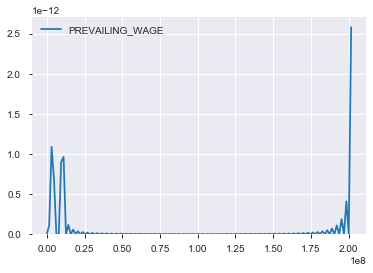

In [35]:
sns.kdeplot(df1['PREVAILING_WAGE'])

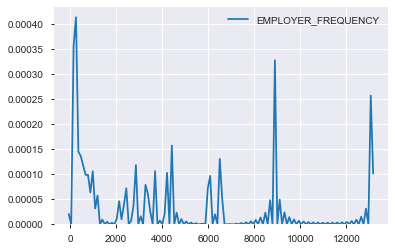

In [36]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [37]:
from scipy import stats

(array([2.68120e+04, 3.59557e+05, 1.70000e+01, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2.56363607,  49.57175327,  96.57987046, 143.58798766,
        190.59610486, 237.60422205, 284.61233925, 331.62045645,
        378.62857365, 425.63669084, 472.64480804]),
 <a list of 10 Patch objects>)

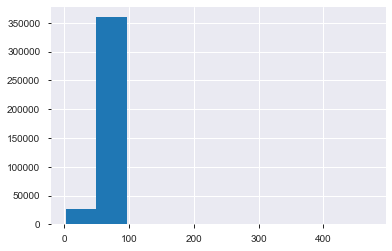

In [38]:
a = df1['PREVAILING_WAGE'].values
tags_ratio = stats.boxcox(a, 0.25)
plt.hist(tags_ratio)

(array([119786.,  98118.,  58576.,  24336.,  19621.,   2100.,  20701.,
          8583.,  21467.,  13103.]),
 array([ 0.        ,  3.87959505,  7.7591901 , 11.63878515, 15.5183802 ,
        19.39797525, 23.2775703 , 27.15716535, 31.0367604 , 34.91635546,
        38.79595051]),
 <a list of 10 Patch objects>)

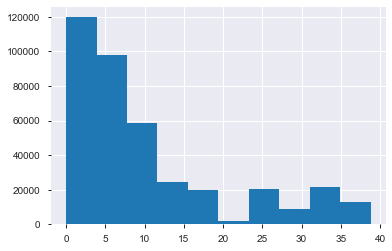

In [39]:
a = df1['EMPLOYER_FREQUENCY'].values
tags_ratio1 = stats.boxcox(a, 0.25)
plt.hist(tags_ratio1)

In [40]:
df1['PREVAILING_WAGE'] = tags_ratio
df1['EMPLOYER_FREQUENCY'] = tags_ratio1

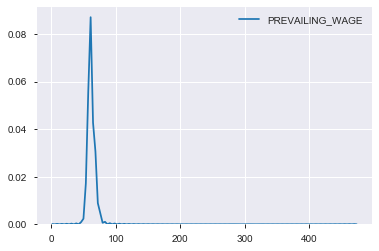

In [41]:
sns.kdeplot(df1['PREVAILING_WAGE'])

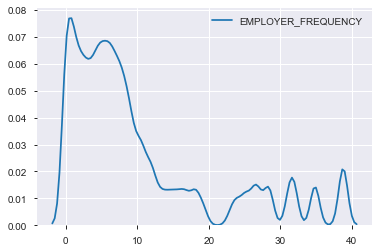

In [42]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [43]:
X = df1.drop(['CASE_STATUS','TOTAL_WORKERS'],axis=1)
y = df1.CASE_STATUS

In [44]:
from imblearn.over_sampling import SMOTE
s = SMOTE('minority')

In [45]:
xtrain_reset,ytrain_reset = s.fit_sample(xtrain,ytrain)
xtest_reset,ytest_reset = s.fit_sample(xtrain,ytrain)


In [46]:
pred1 = rf.fit(xtrain_reset,ytrain_reset).predict(xtest_reset)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
